In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
### Divide the data in features(x) and target(y)
x = data['YearsExperience'].values
y = data['Salary'].values
print(x,'\n\n',y)

[ 1.1  1.3  1.5  2.   2.2  2.9  3.   3.2  3.2  3.7  3.9  4.   4.   4.1
  4.5  4.9  5.1  5.3  5.9  6.   6.8  7.1  7.9  8.2  8.7  9.   9.5  9.6
 10.3 10.5] 

 [ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


In [ ]:
x.shape

(30,)

In [ ]:
y.shape

(30,)

In [ ]:
x = x.reshape(len(x),1)
x.shape

(30, 1)

In [ ]:
len(x)

30

In [ ]:
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [ ]:
### Split the data into training and testing
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.80,random_state=30)

In [ ]:
xtest

array([[ 4.9],
       [10.3],
       [ 9.5],
       [ 3.9],
       [ 8.7],
       [ 1.1]])

In [ ]:
#### Build the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
#### Train the model
model.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
xtest

array([[ 4.9],
       [10.3],
       [ 9.5],
       [ 3.9],
       [ 8.7],
       [ 1.1]])

In [ ]:
ytest

array([ 67938., 122391., 116969.,  63218., 109431.,  39343.])

In [ ]:
#### Prediction
ypred = model.predict(xtest)
ypred

array([ 72023.51967848, 123221.12252239, 115636.29247144,  62542.48211479,
       108051.46242049,  35995.57693647])

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(ytest,ypred)
r2

0.9944092048209745

In [ ]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(ytest,ypred)
error

5453562.21914827

In [ ]:
### Cross Validation
r_sco = []
r_state = [] 
for i in range(1,51):
  xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.80,random_state=i)
  model = LinearRegression()
  model.fit(xtrain,ytrain)
  ypred = model.predict(xtest)
  r2 = r2_score(ytest,ypred)
  r_sco.append(r2)
  r_state.append(i)

In [ ]:
import numpy as np
arr = np.array(r_sco)
arr

In [ ]:
arr.max()

In [ ]:
arr.argmax()

In [ ]:
### Equation of line
c = model.intercept_
m = model.coef_
print(m,c)

[9481.03756369] 25566.43561640947


In [ ]:
### Predict a new Value (salary for 24.5 yrs)
yp = m * 24.5 + c
yp

array([257851.85592675])

In [ ]:
model.predict([[24.5]])

array([257851.85592675])

In [ ]:
### Line of Regression for Training Samples
plt.scatter(xtrain,ytrain,color='orange',label="Training Samples")
plt.scatter(xtrain,model.predict(xtrain),color='blue',label="Predicted Samples")
plt.plot(xtrain,model.predict(xtrain),color='red',label="Line Of Regression")
plt.legend(loc=2)
plt.show()

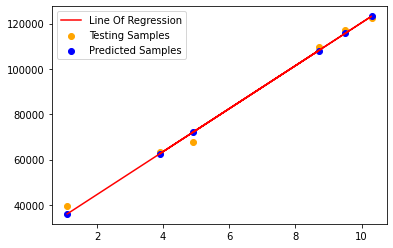

In [ ]:
### Line of Regression for Testing Samples
plt.scatter(xtest,ytest,color='orange',label="Testing Samples")
plt.scatter(xtest,model.predict(xtest),color='blue',label="Predicted Samples")
plt.plot(xtest,model.predict(xtest),color='red',label="Line Of Regression")
plt.legend(loc=2)
plt.show()